In [1]:
from sklearn import datasets 
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np 
import pandas as pd 

In [2]:
iris = datasets.load_iris()
iris_X = iris.data 
y = iris.target 

In [4]:
from sklearn import decomposition 
pca = decomposition.PCA()
pca.get_params()

{'copy': True,
 'iterated_power': 'auto',
 'n_components': None,
 'random_state': None,
 'svd_solver': 'auto',
 'tol': 0.0,
 'whiten': False}

In [5]:
#Fitting
iris_pca = pca.fit_transform(iris_X)
iris_pca[:5]

array([[-2.68412563e+00,  3.19397247e-01, -2.79148276e-02,
        -2.26243707e-03],
       [-2.71414169e+00, -1.77001225e-01, -2.10464272e-01,
        -9.90265503e-02],
       [-2.88899057e+00, -1.44949426e-01,  1.79002563e-02,
        -1.99683897e-02],
       [-2.74534286e+00, -3.18298979e-01,  3.15593736e-02,
         7.55758166e-02],
       [-2.72871654e+00,  3.26754513e-01,  9.00792406e-02,
         6.12585926e-02]])

#### `PCA` maps the original dataset into a new space where eeach of the new column vectors are othogonal <br>

In [6]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

##### It transforms the covriance matrix of the data into column vectors tht can explain certain precentage of the variance 

In [7]:
pca = decomposition.PCA(n_components=2)
iris_X_prime = pca.fit_transform(iris_X)
iris_X_prime.shape

(150, 2)

In [8]:
#Lets see how much of the variance is represented by the two components that remain

pca.explained_variance_ratio_.sum()

0.977685206318795

Text(0.5, 1.0, 'After PCA')

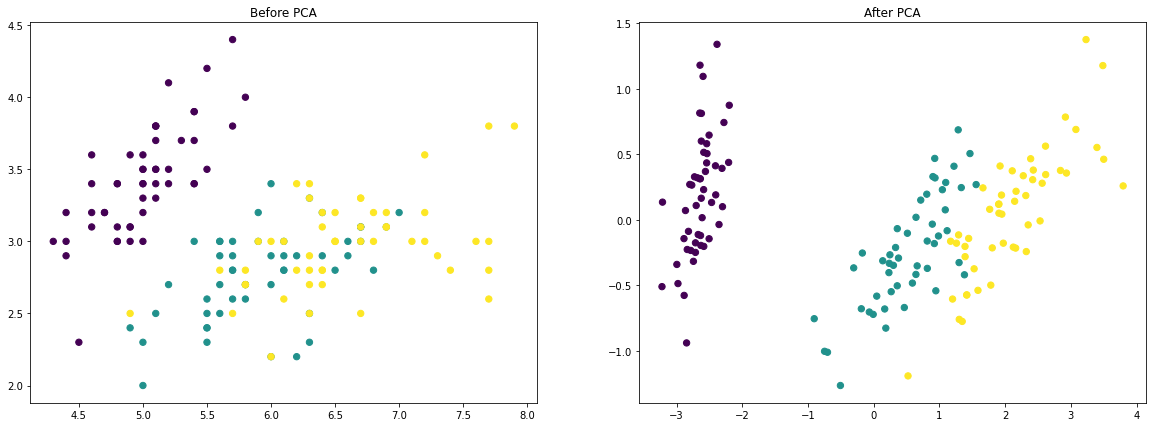

In [9]:
#Visualizing effect of PCA 

fig = plt.figure(figsize=(20,7))
ax = fig.add_subplot(121)
ax.scatter(iris_X[:,0], iris_X[:,1],c=y,s=40)
ax.set_title("Before PCA")

ax2 = fig.add_subplot(122)
ax2.scatter(iris_X_prime[:,0],iris_X_prime[:,1],c=y,s=40)
ax2.set_title("After PCA")

In [10]:
#PCA object can also be created with the amount of explained variance from the start. 

pca = decomposition.PCA(n_components=0.98)
iris_X_prime = pca.fit_transform(iris_X)
pca.explained_variance_ratio_.sum()

0.9947878161267247

In [11]:
#However, better to scale before PCA 

from sklearn import preprocessing 

iris_X_scaled = preprocessing.scale(iris_X)
pca = decomposition.PCA(n_components=2)
iris_X_scaled = pca.fit_transform(iris_X_scaled)

Text(0.5, 1.0, 'Scaled data before PCA')

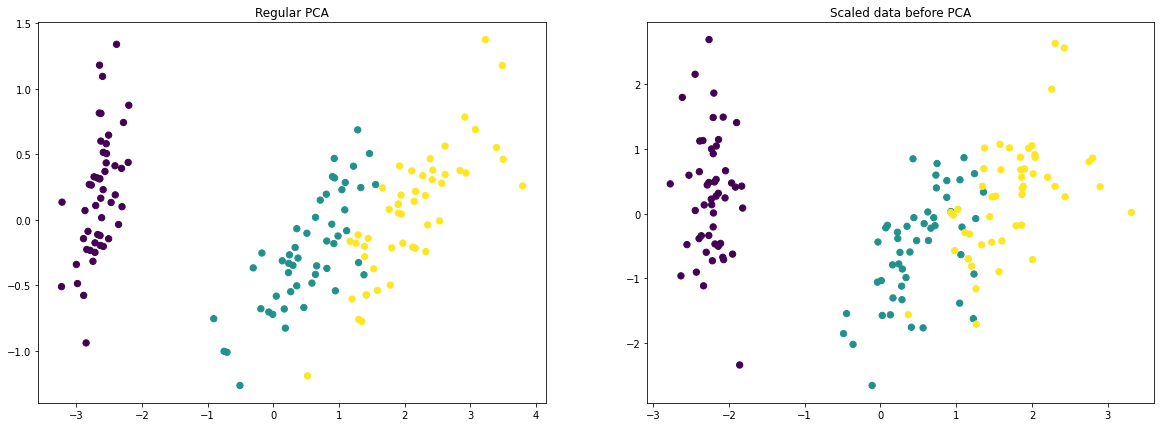

In [12]:
fig = plt.figure(figsize=(20,7))
ax = fig.add_subplot(121)
ax.scatter(iris_X_prime[:,0], iris_X_prime[:,1],c=y,s=40)
ax.set_title("Regular PCA")

ax2 = fig.add_subplot(122)
ax2.scatter(iris_X_scaled[:,0],iris_X_scaled[:,1],c=y,s=40)
ax2.set_title("Scaled data before PCA")

In [13]:
#Preferable, scaling should be done with pipeline 

from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler 

pipe = Pipeline([('scaler', StandardScaler()),('pca',decomposition.PCA(n_components=2))])
iris_X_scaled = pipe.fit_transform(iris_X)

Text(0.5, 1.0, 'Standard_Scaler used before PCA')

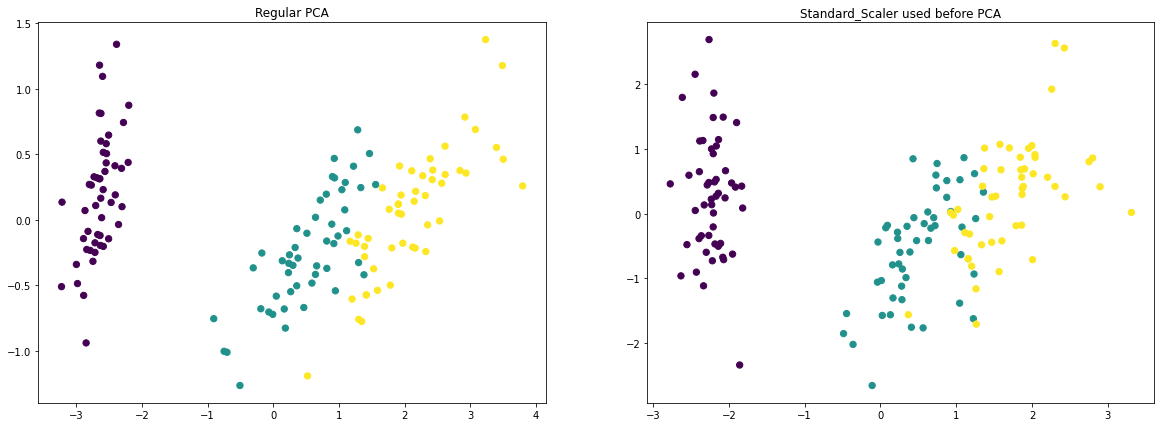

In [14]:
fig = plt.figure(figsize=(20,7))
ax = fig.add_subplot(121)
ax.scatter(iris_X_prime[:,0], iris_X_prime[:,1],c=y,s=40)
ax.set_title("Regular PCA")

ax2 = fig.add_subplot(122)
ax2.scatter(iris_X_scaled[:,0],iris_X_scaled[:,1],c=y,s=40)
ax2.set_title("Standard_Scaler used before PCA")